# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) #retirando avisos de depreciacao
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

base = pd.read_csv("b1abb33c4f.csv")
base

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
categorias = [] #criando categoria

#categorizando por valor usando if

for valor in base['APGAR5']:
    if valor >= 0 and valor <= 3:
        categorias.append('asfixia grave')
    elif valor >= 4 and valor <= 5:
        categorias.append('asfixia moderada')
    elif valor >= 6 and valor <= 7:
        categorias.append('asfixia leve')
    else:
        categorias.append('normal')

base['cat_APGR5'] = categorias #inserindo coluna no df

base.cat_APGR5.value_counts()

cat_APGR5
normal              26566
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

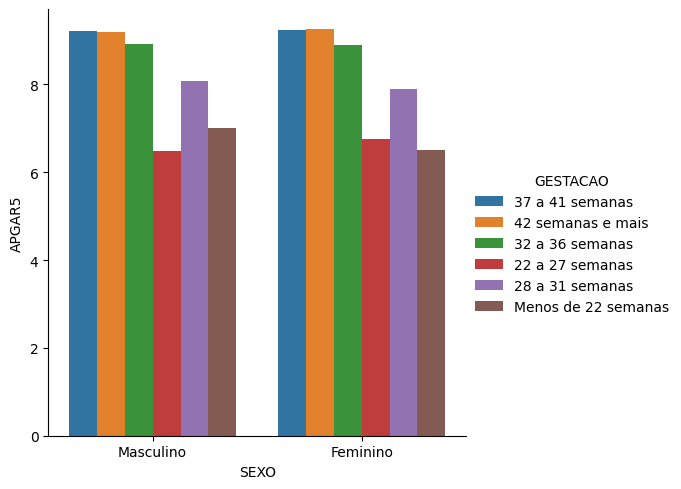

In [3]:
#criacao de grafico de comparacao, duvida: essa é a melhor forma de apresentar estes valores? Qual seria a melhor opcao para estes casos?

#g = sns.catplot( x='GESTACAO',
             #y='APGAR5',
             #kind='bar',
             #hue='SEXO', 
             #data=base)
# Rotacionando os rótulos do eixo x para melhorar a visualizacao
#g.set_xticklabels(rotation=45)

sns.catplot(x='SEXO', y='APGAR5'
            , hue='GESTACAO'
            , kind='bar'
            , data=base
            , errorbar=None
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [4]:
tab_cruzada = pd.crosstab(base['GESTACAO'], base['APGAR5'])
tab_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [5]:
cruzada_pctlin = tab_cruzada.div(tab_cruzada.sum(axis=1), axis=0)
cruzada_pctlin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


In [6]:
cruzada_pctlin.sum(axis=1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

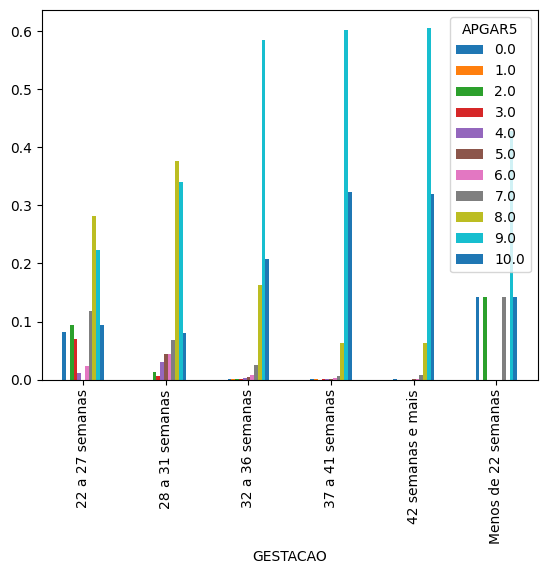

In [7]:
cruzada_pctlin.plot.bar()

#é visivel que abaixo das 37 semanas temos uma reducao nos valores para os teste de APGAR5, apresentando resultados um maior numero de resultados nao saudaveis. Porem, ainda temos a maioria superior a 8 onde e categorizado como saudavel.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

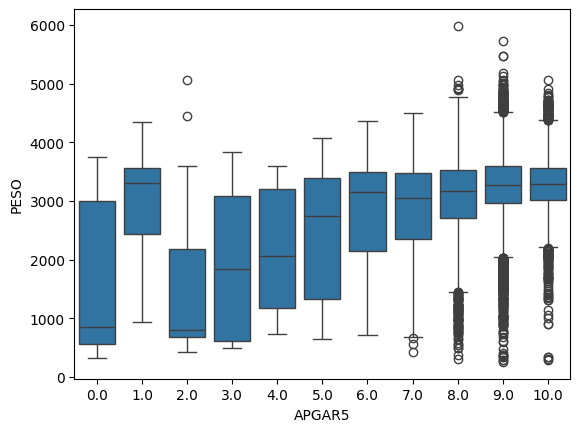

In [8]:
sns.boxplot(x='APGAR5', y='PESO', data=base)

In [9]:
relacao = base[['APGAR5','PESO']].corr() #metodo .corr para verificar a correlacao entre as variaveis
relacao

,APGAR5,PESO
APGAR5,1.00000,0.16821
PESO,0.16821,1.00000


In [10]:
coef_relacao = base['APGAR5'].corr(base['PESO']) #valor especifico da correlacao entre as variaveis
print(f"Coeficiente de correlacao entre APGAR5 e PESO: {coef_relacao}")

Coeficiente de correlacao entre APGAR5 e PESO: 0.16821001802434465


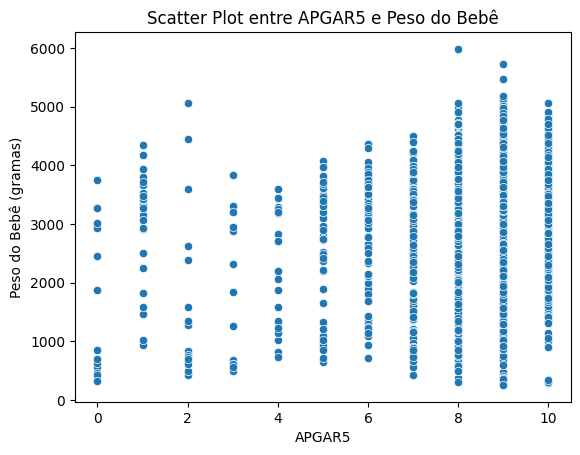

In [11]:
#relacao com grafico de dispersao

sns.scatterplot(x='APGAR5', y='PESO', data=base)
# Adicionando títulos e labels
plt.title('Scatter Plot entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (gramas)')

plt.show()

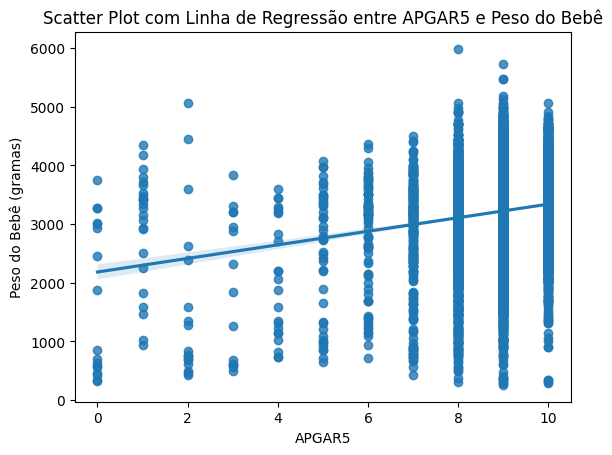

In [12]:
#visao scatter plot com linha de regressao

sns.regplot(x='APGAR5', y='PESO', data=base)
# Adicionando títulos e labels
plt.title('Scatter Plot com Linha de Regressão entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (gramas)')

plt.show()